In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Coin exercise**

Let's do some experiments with a coin and the Laplace rule

In [2]:
import numpy as np
import random 

In [3]:
value_range = 2
experiments_number = 2000 # The more times we run the experiment, the closest it will get to our probability estimation


result = np.random.randint(value_range, size=experiments_number) # random number between 0 and n-1

print(f"Result random experiment: {result}")

Result random experiment: [0 0 1 ... 0 0 1]


In [4]:
np.count_nonzero(result)/experiments_number

0.512

In [5]:
result.mean()

0.512

In [6]:
# this obviously needs to be equal to the number of experiments
np.count_nonzero(result==0) + np.count_nonzero(result==1) 

2000

In [7]:
np.count_nonzero(result==0)/experiments_number

0.488

In [8]:
# We can see in a practical way what complimentary events are
1-np.count_nonzero(result==0)/experiments_number

0.512

In [9]:
# If the probabilities in p do not sum to 1, an error will be raised
newsize = 10000

newresult = np.random.choice([0,1], p=[0.2,0.8], size=newsize)

# Obviously, the probability of the entire sample space must sum to 1; otherwise, an error will occur

In [10]:
# The result must be very similar to the probability established above
np.count_nonzero(newresult==0)/newsize

0.1964

# **Dice exercise**

Create a random event that throws a dice with 6 sides (entire sample = 1 to 6)

What is the probability of obtining the number 3?

In [11]:
experiments_number = 50000

# Random int between 1 and 6
result = np.random.randint(1, 7, size=experiments_number)
print(f"Result random experiment: {result}")

# Probability of obtaining 3 (according to Laplace's rule)
prob = np.count_nonzero(result==3)/experiments_number
print(f"Probability of obtaining 3: {prob}")
# P=1/6 = 1.666

Result random experiment: [6 5 1 ... 4 4 2]
Probability of obtaining 3: 0.16646


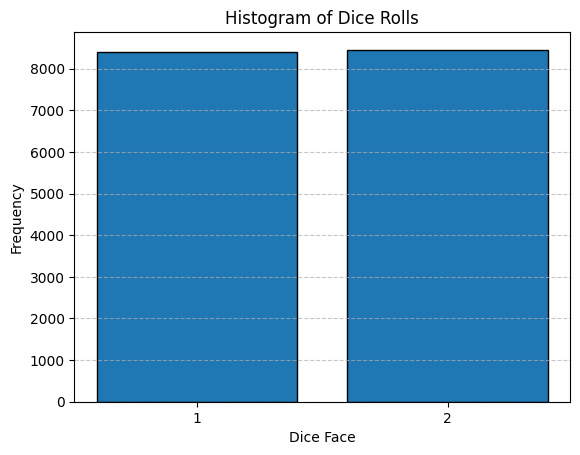

In [12]:
import matplotlib.pyplot as plt
# Plot histogram. As we can see the theoretical probability for each number is the same, and the "practice" 
# should be close to it
plt.hist(result, bins=np.arange(1, value_range + 2) - 0.5, edgecolor='black', rwidth=0.8)
plt.title('Histogram of Dice Rolls')
plt.xlabel('Dice Face')
plt.ylabel('Frequency')
plt.xticks(range(1, value_range + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

What is the probability of obtaining an even number?

In [13]:
# The even numbers on a dice are 2, 4, 6, the odd are obviously 1, 3, 5
# By Laplace's rule (and logic), P(even number) = 0.5. Let's see if that is true with some experiments
experiments_number = 50000

# Random int between 1 and 6
result = np.random.randint(1, 7, size=experiments_number)
print(f"Result random experiment: {result}")

# Probability of obtaining 2,4,6 (according to Laplace's rule)
prob = (np.count_nonzero(result==2) + np.count_nonzero(result==4) + np.count_nonzero(result==6))/experiments_number
print(f"Probability of obtaining even: {prob}")
# P=3/6 = 0.5

Result random experiment: [1 6 2 ... 5 2 6]
Probability of obtaining even: 0.49898


What is the probability of obtaining a number smaller than 3?

In [14]:
# Well the dice has 6 numbers... and we are being asked P(X<3), that means the sample space = {1, 2}
# thus according to Laplace's rule P(X<3)=2/6=0.333. Let's see if the experiments tells us the same story:
experiments_number = 50000

# Probability of obtaining 1,2,3,4,5 (according to Laplace's rule)
prob = (np.count_nonzero(result==1) 
        + np.count_nonzero(result==2))/experiments_number
print(f"Probability of obtaining even: {prob}") # and that meets the expectations!

Probability of obtaining even: 0.33444
